# Simulation of DLTS signal
This notebook simulates the conventional and Fourier DLTS signals.

In [1]:
%matplotlib inline
import numpy as np
from DLTSsimulator import trapLevel
import matplotlib.pyplot as plt

### Plot a single capacitance transient
\begin{align}
C(t,T)= \Delta C_0 \exp(-e_m(T)t)
\end{align}
where the emission rate $e_m(T)$ is described by:
\begin{align}
e_m(T)\propto\exp(-\frac{qE_a}{kT})
\end{align}

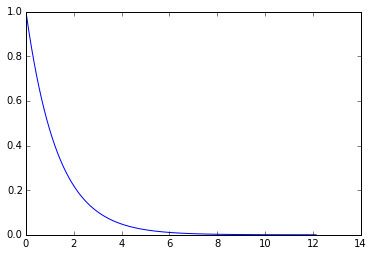

In [2]:
tp = trapLevel([0.005])
ttime = np.linspace(0, 10, 1000) / tp.emRateT(300)
_, ts1 = tp.getTransient(210, ttime)
plt.plot(ttime, ts1)
plt.show()

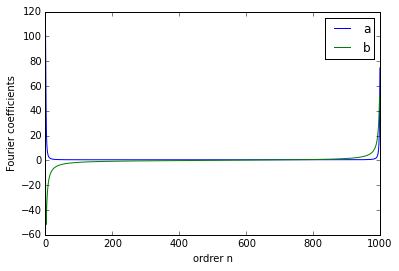

In [3]:
cn=np.fft.fft(ts1)
plt.plot(np.real(cn),hold=True,label="a")
plt.plot(np.imag(cn),label="b")
plt.ylabel("Fourier coefficients")
plt.xlabel("ordrer n")
plt.legend()

### Simulate conventional DLTS
For conventional DLTS, we select two time points $t_1$ and $t_2$.
The dlts signal of each temperature point $T_k$ is then calculated by

\begin{align}
\Delta C(t_2,t_1,T_k)= \Delta C_0 \exp(-e_m(T_k)t_2)- \Delta C_0 \exp(-e_m(T_k)t_1)
\end{align}

Assuming that we have two trap level states with activation energies 0.05 eV and 0.1 eV:

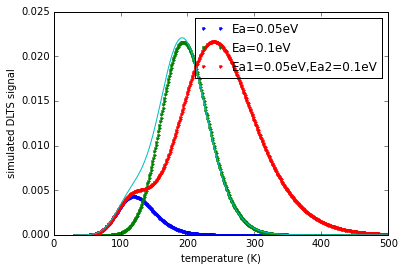

In [4]:
tp1 = trapLevel([0.05],cap_rate=[1],delta_c=[0.01])
tp2 = trapLevel([0.1],cap_rate=[1],delta_c=[0.05])
tp3 = trapLevel([0.05, 0.1],cap_rate=[1,1],delta_c=[0.01,0.05])

T = np.linspace(30, 500, num=500);
tp_arr=[tp1,tp2,tp3]

dltsSig_list=[]
label_list=["Ea=0.05eV","Ea=0.1eV","Ea1=0.05eV,Ea2=0.1eV"]
for tp_i,tp in enumerate(tp_arr):
    dltsSig = tp.getConvDLTS(TRange=T, plotTransient=False)
    dltsSig_list.append(dltsSig)
    pass

for i,d in enumerate(dltsSig_list):
    plt.plot(d[:,0],d[:,1], '.',label=label_list[i])
    

plt.plot(dltsSig_list[0][:,0],dltsSig_list[0][:,1]+dltsSig_list[1][:,1])
plt.xlabel('temperature (K)')
plt.ylabel('simulated DLTS signal')
plt.legend()
plt.show()

### Fit the Gaussian function to conventional DLTS
The DLTS of Ea=0.1eV looks very like Gaussian function, we can check.

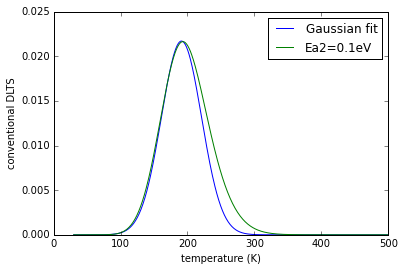

In [5]:
def gaussian(a_0,t,b,c):
    return a_0*np.exp(-(t-b)**2/(2*c**2))
T=dltsSig_list[1][:,0]
plt.plot(T,gaussian(0.0217,T,191,30),label="Gaussian fit")
plt.plot(T,dltsSig_list[1][:,1],label='Ea2=0.1eV')
plt.xlabel("temperature (K)")
plt.ylabel("conventional DLTS")
plt.legend()

The result shows that, although conventional DLTS looks pretty much like Gaussian, the shape of conventional DLTS is skewed. In other words, it is not a symmetric distributaion, and therefore not Gaussian or Lorenzian.

### Plot the result of DLTFS
We plot the DLTFS using the same transients as we used in conventional DLTS.
In this calulation, we get the transients of each temperature and run discrete Fourier transform. Then we plot the Fourier coefficient b1 versus temperature. This is the process that is identical to our DLTS system.

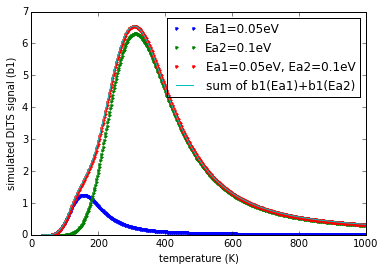

In [6]:
tp1 = trapLevel([0.05],cap_rate=[1],delta_c=[0.01])
tp2 = trapLevel([0.1],cap_rate=[1],delta_c=[0.05])
tp3 = trapLevel([0.05, 0.1],cap_rate=[1,1],delta_c=[0.01,0.05])

# Setting of temperature range
T = np.linspace(30, 1000, num=500);

dltsSig=np.zeros((T.shape[0],3))

rateWindowList = [0.1,0.011]

tp_list=[tp1,tp2,tp3];

for tp_i,tp in enumerate(tp_list):
    for i,t in enumerate(T):
        _,trans=tp.getTransient(t,t=np.linspace(0,100,num=1000))
        dltsSig[i,tp_i] = -np.imag(np.fft.fft(trans))[1]
    pass
       

plt.plot(T, dltsSig[:,0], '.',label="Ea1=0.05eV")
plt.plot(T, dltsSig[:,1], '.',label='Ea2=0.1eV')
plt.plot(T, dltsSig[:,2], '.',label='Ea1=0.05eV, Ea2=0.1eV')
plt.plot(T, dltsSig[:,0]+dltsSig[:,1],'-',label='sum of b1(Ea1)+b1(Ea2)')

plt.xlabel('temperature (K)')
plt.ylabel('simulated DLTS signal (b1)')
plt.legend()
plt.show()

### Fitting a Gaussian function to DLTFS
We then compare one of the DLFTS we plotted with a Gaussian function

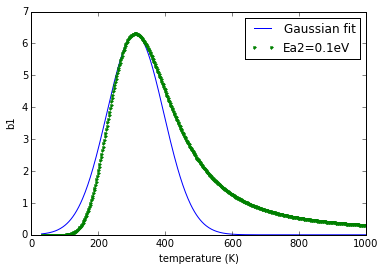

In [7]:
#t=np.linspace(0,800,num=100)

plt.plot(T,gaussian(6.3,T,310,85),label="Gaussian fit")
plt.plot(T,dltsSig[:,1], '.',label='Ea2=0.1eV')
plt.xlabel("temperature (K)")
plt.ylabel("b1")
plt.legend()

We can see that a Gaussian function is definitely not a good estimate for DLFTS signal. 